<a href="https://colab.research.google.com/github/DataNata/Data-Science-for-finance-and-investments/blob/main/Linear_regression_model_for_exchange_rate_%24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression for Exchange rate Prediction in Python


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = [12, 12]

import statsmodels.api as sm
import seaborn as sns


from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [4]:
dataset= pd.read_excel('/content/Agr_Data_macroRU.xlsx')
print(dataset)
dataset.shape

          data data start month  year  Exchange rate  Interest rate   Export  \
0   2005-01-31       2005-01-01  2005        28.0800            NaN  13675.0   
1   2005-02-28       2005-02-01  2005        27.7700            NaN  15867.0   
2   2005-03-31       2005-03-01  2005        27.8300            NaN  19549.0   
3   2005-04-30       2005-04-01  2005        27.7700            NaN  19515.0   
4   2005-05-31       2005-05-01  2005        28.0900            NaN  20047.0   
..         ...              ...   ...            ...            ...      ...   
238 2024-11-30       2024-11-01  2024       107.7409           21.0  39047.0   
239 2024-12-31       2024-12-01  2024       101.6797           21.0  39250.0   
240 2025-01-31       2025-01-01  2025        98.0062           21.0  29400.0   
241 2025-02-28       2025-02-01  2025        87.6967           21.0  30888.0   
242 2025-03-31       2025-03-01  2025        83.6813           21.0      NaN   

      Import  
0     6934.0  
1     834

(243, 7)

In [5]:
df_final=dataset.fillna(0)

df_final=df_final.loc[df_final['Interest rate'] != 0]
df_final=df_final.loc[df_final['Export'] != 0]

In [6]:
df_final=df_final.drop(['year','data','data start month'], axis=1)
print(df_final)

     Exchange rate  Interest rate   Export   Import
192        76.2527           4.25  26679.0  17326.0
193        74.4373           4.25  30318.0  20639.0
194        75.7023           4.50  36309.0  24920.0
195        74.3823           5.00  36504.0  25629.0
196        73.5870           5.00  34858.0  24524.0
197        72.3723           5.50  43266.0  25323.0
198        73.1388           6.50  43403.0  26076.0
199        73.5744           6.50  43271.0  26029.0
200        72.7608           6.75  45424.0  25516.0
201        70.5200           7.50  46955.0  26694.0
202        74.9818           7.50  49026.0  27553.0
203        74.2926           8.50  58148.0  30817.0
204        77.8174           8.50  47023.0  24087.0
205        83.5485           9.50  51473.0  27076.0
206        84.0851          20.00  56062.0  18598.0
207        71.0237          14.00  48307.0  16700.0
208        63.0975          11.00  49618.0  18861.0
209        51.1580           9.50  53898.0  21181.0
210        6

In [7]:
df_final.corr()

,Exchange rate,Interest rate,Export,Import
Exchange rate,1.000000,0.717701,-0.499390,0.182261
Interest rate,0.717701,1.000000,-0.183700,-0.066836
Export,-0.499390,-0.183700,1.000000,0.198241
Import,0.182261,-0.066836,0.198241,1.000000


In [8]:

df_final=df_final.rename(columns={'Exchange rate':'Exchangerate'})
df_final=df_final.rename(columns={'Interest rate':'Interestrate'})

In [14]:
X = df_final.drop(['Exchangerate'], axis=1)
y = df_final['Exchangerate']

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=0)



In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
# the coefficients
lm.coef_

array([ 1.50663915e+00, -7.23643055e-04,  1.28676595e-03])

In [18]:
# r squared
lm.score(X, y)

0.7485231564257124

In [19]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                  Coef
Interestrate  1.506639
Export       -0.000724
Import        0.001287


Training the model with multivariable regression using OLS

In [20]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:           Exchangerate   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     40.69
Date:                Thu, 15 May 2025   Prob (F-statistic):           1.18e-11
Time:                        16:34:00   Log-Likelihood:                -130.25
No. Observations:                  40   AIC:                             268.5
Df Residuals:                      36   BIC:                             275.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           60.3678     10.026      6.021   

Predicting Test Data

In [22]:
predictions = lm.predict(X_valid)

Text(0.5, 1.0, 'Yearly Amount Spent vs. Model Predictions')

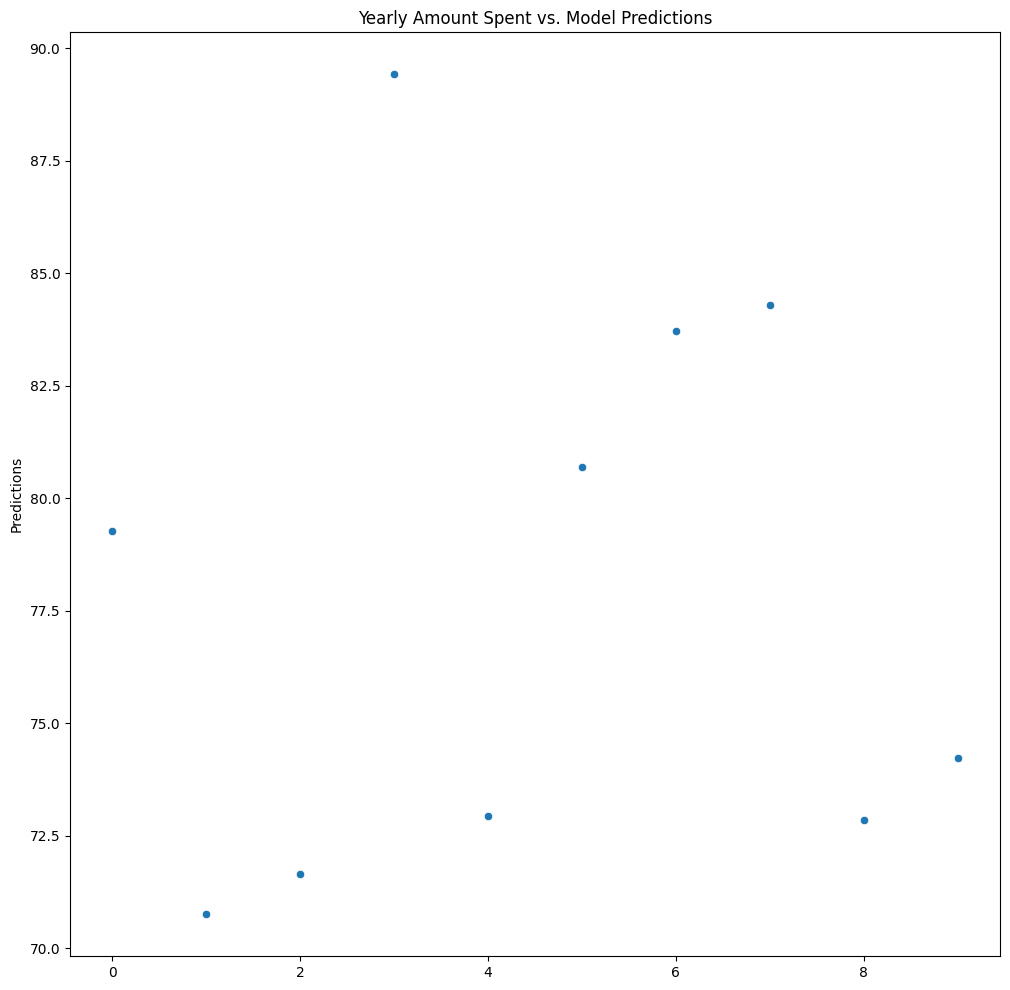

In [25]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(predictions)
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')

Evaluation of the model

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [29]:
print('Mean Absolute Error:',mean_absolute_error(y_valid, predictions))
print('Mean Squared Error:',mean_squared_error(y_valid, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_valid, predictions)))

Mean Absolute Error: 4.762699248175769
Mean Squared Error: 39.62910448097812
Root Mean Squared Error: 6.295165167092768


Residuals

<ipython-input-30-c7c10c96ef27>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)


<Axes: xlabel='Exchangerate', ylabel='Density'>

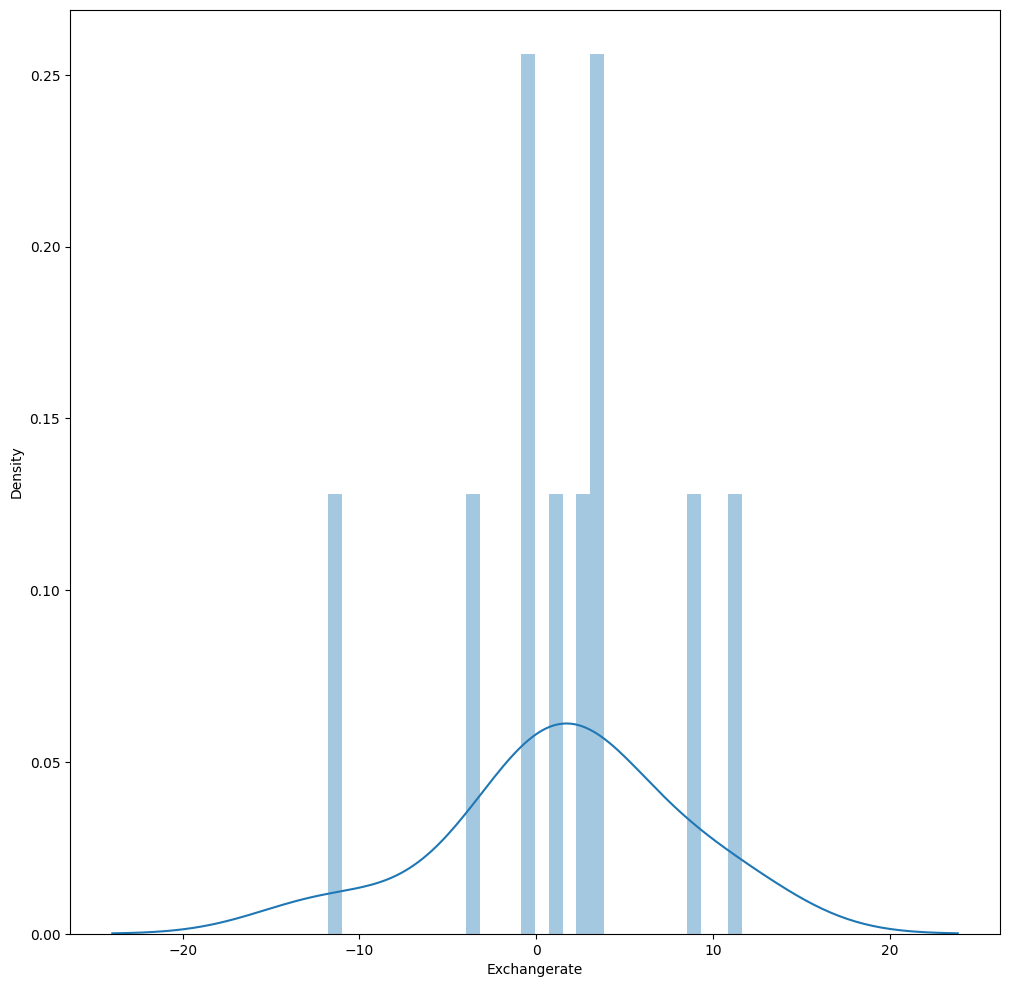

In [30]:
residuals = y_valid-predictions
sns.distplot(residuals, bins=30)

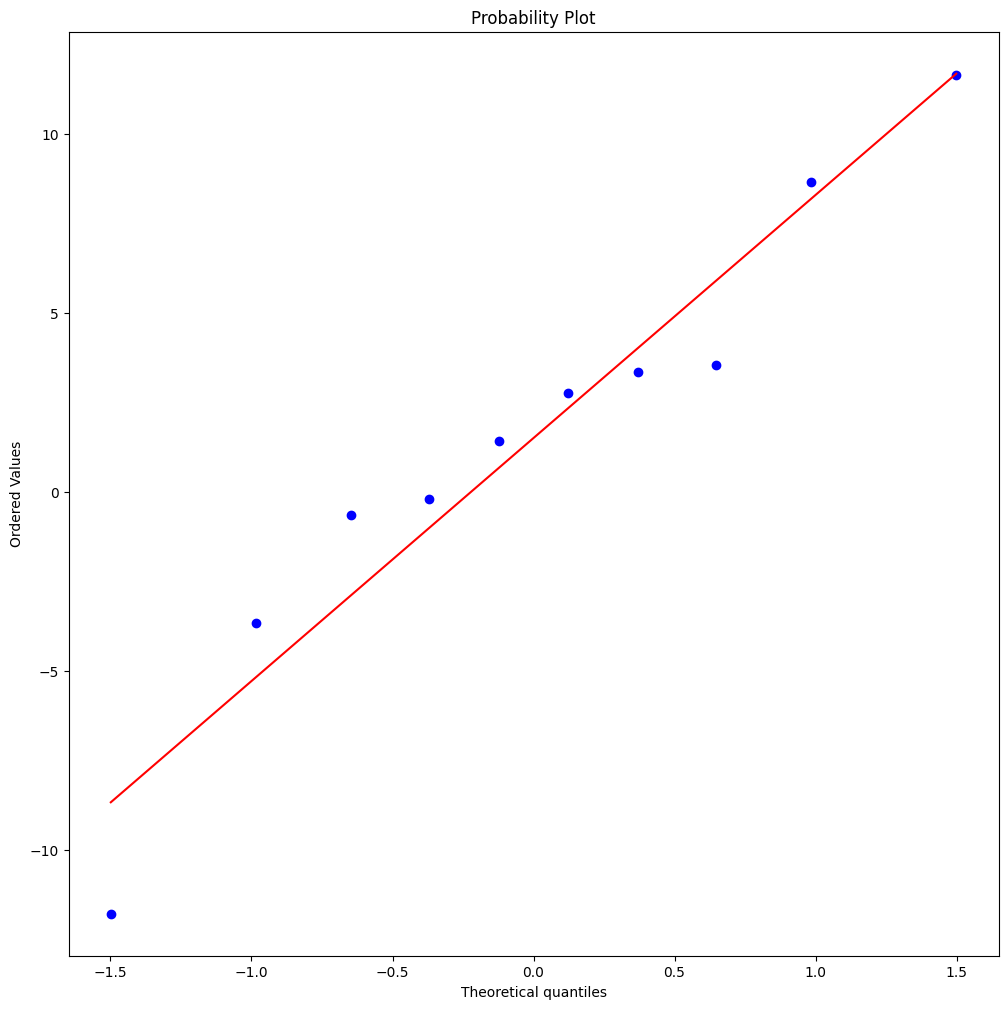

In [31]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

Conclusion
It can be tricky to interpret the information in this analysis. According to the model, the most significant factor for clients is not the time spent on the app or website, but their length of membership. However, of the two predictors (desktop vs app), the app has the strongest influence by far. In fact, the time spent on the desktop website does not seem to have any correlation at all! In other words, according to the data, the amount of time that the customer spends on the desktop website has almost nothing to do with the amount of money they will spend.

We could interpret this in two different ways. Firstly, this could mean that the desktop website needs more work to make its visitors buy more. Secondly, it could mean that people tend to be more influenced by mobile applications of online stores than by desktop websites. So maybe efforts should be directed towards taking advantage of this fact. Indeed, the interpretation of this information requires expertise in the online marketing sphere. Our analysis and our model, however, does a very good job in weighting the predictors importance.